In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Analisis de Histogramas

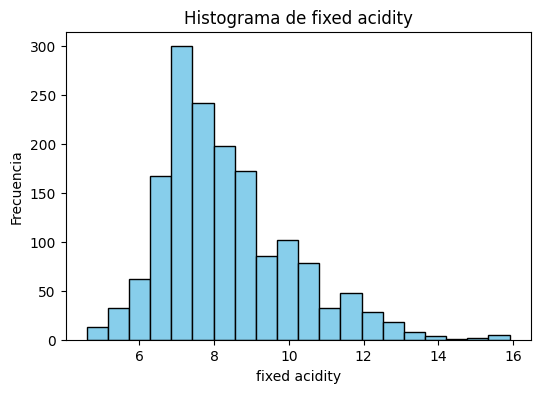

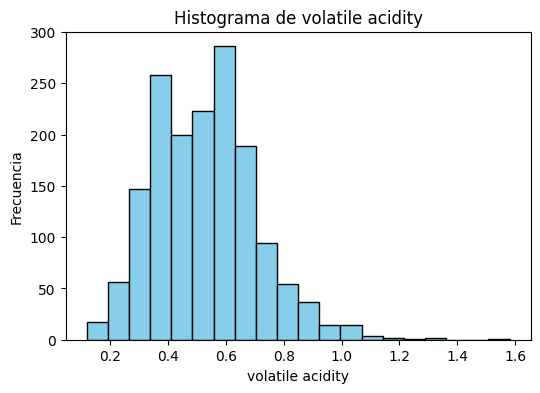

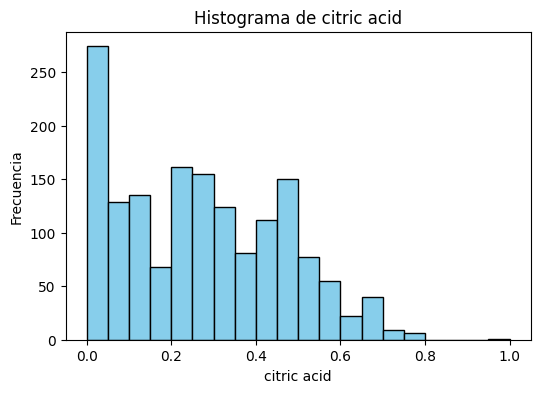

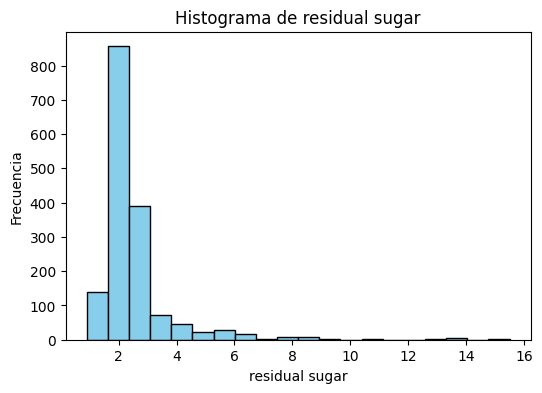

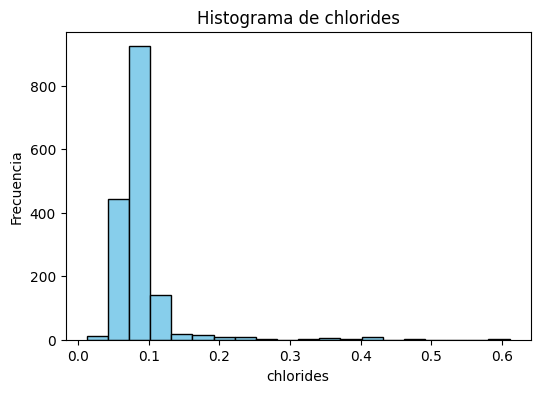

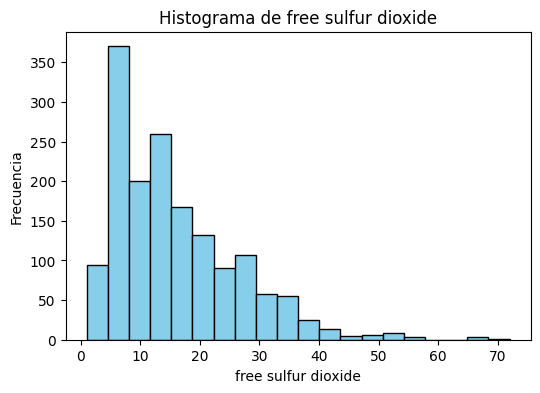

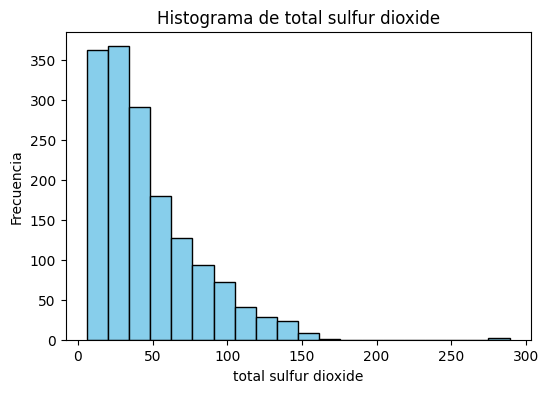

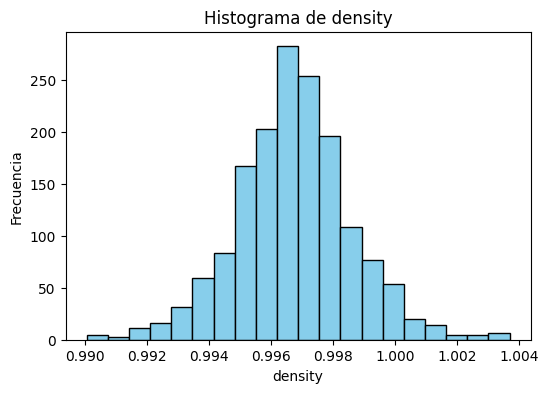

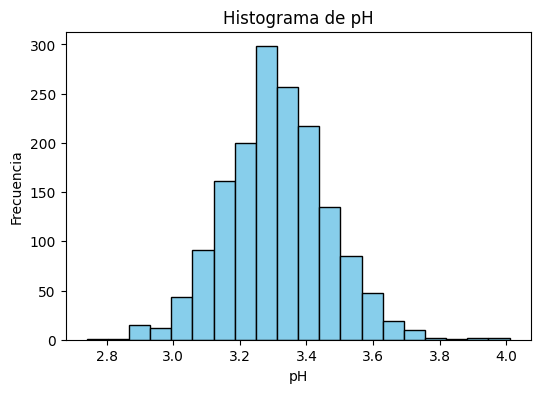

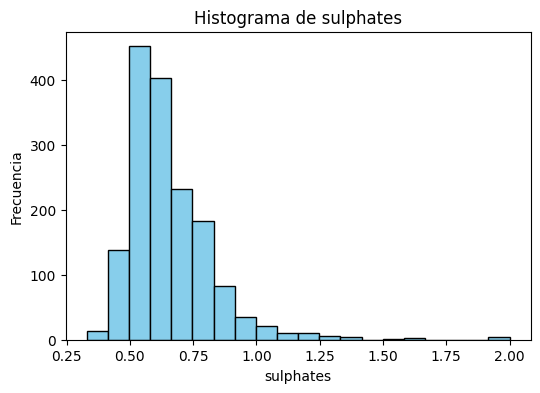

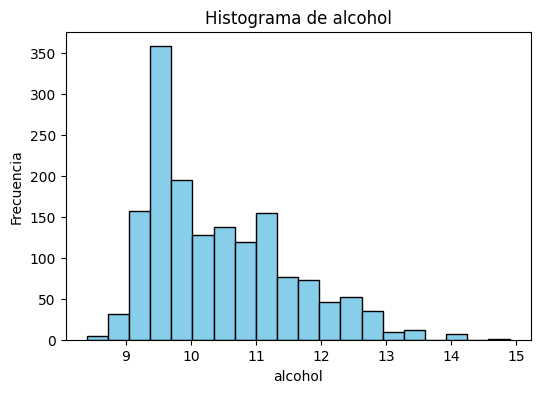

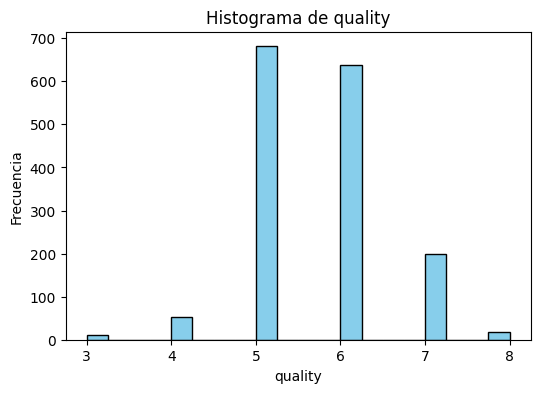

In [3]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

## Analisis de Boxplots

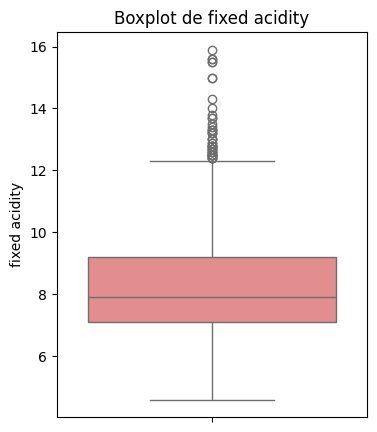

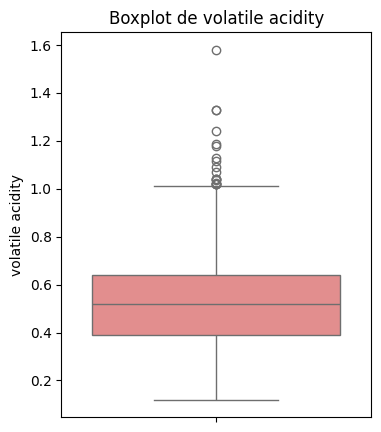

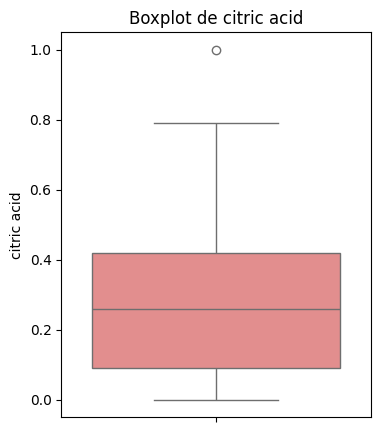

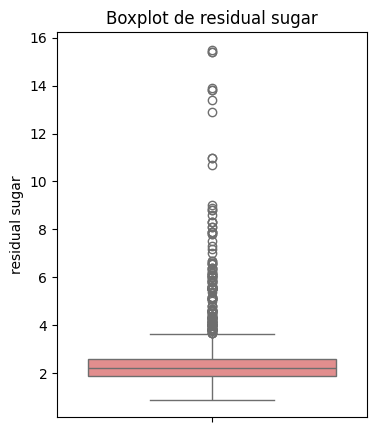

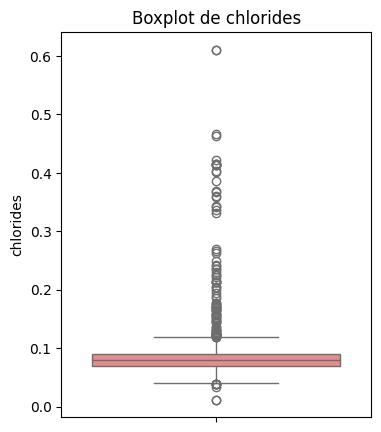

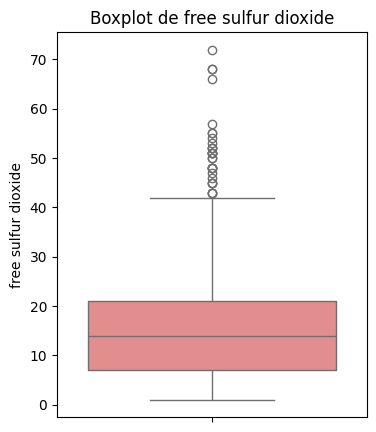

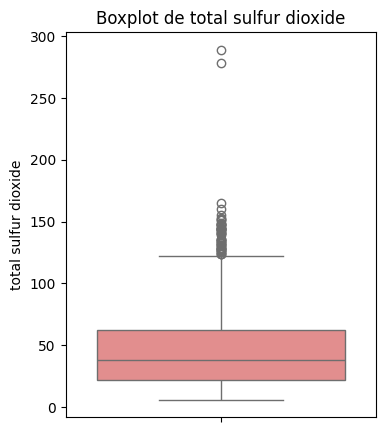

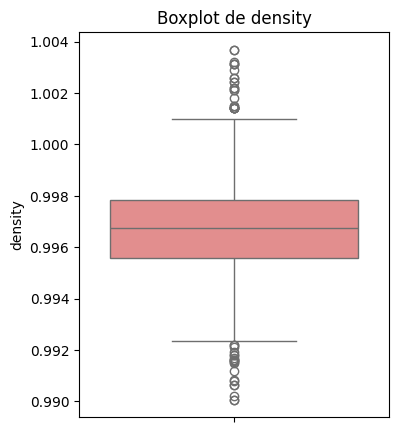

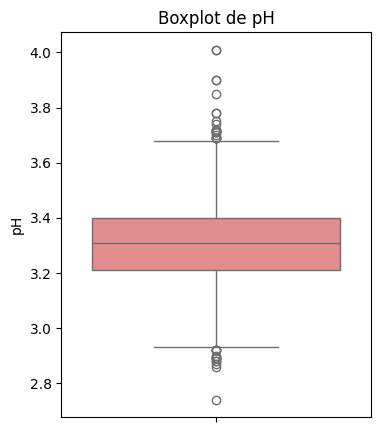

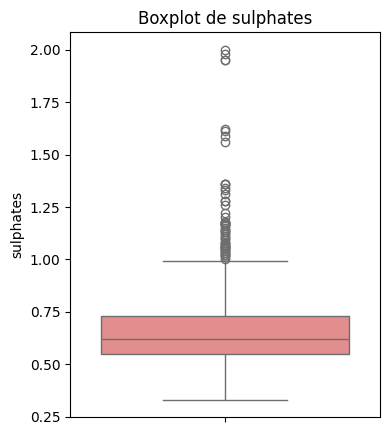

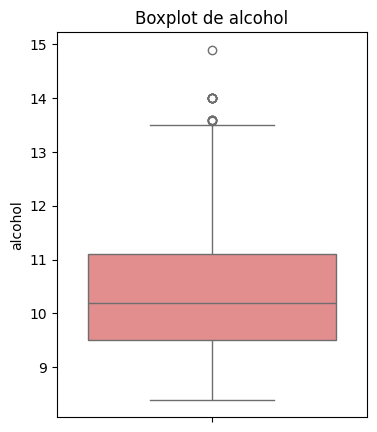

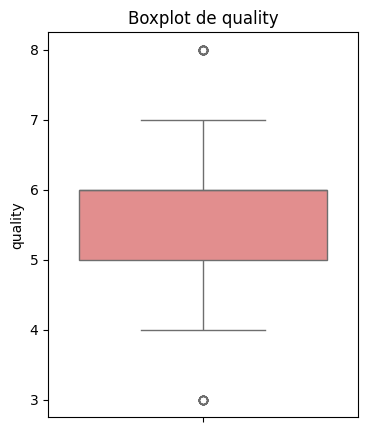

In [4]:
for col in df.columns:  # excluir 'quality'
    plt.figure(figsize=(4, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot de {col}")
    plt.show()

## Matriz de Correlacion

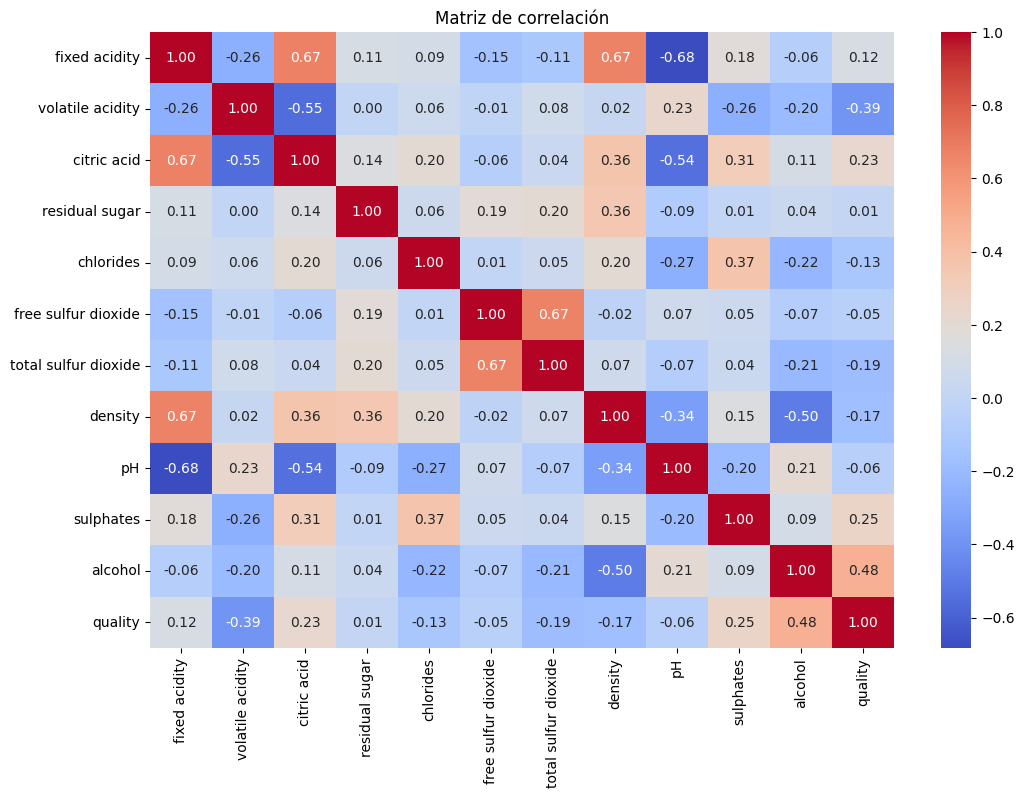

In [5]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

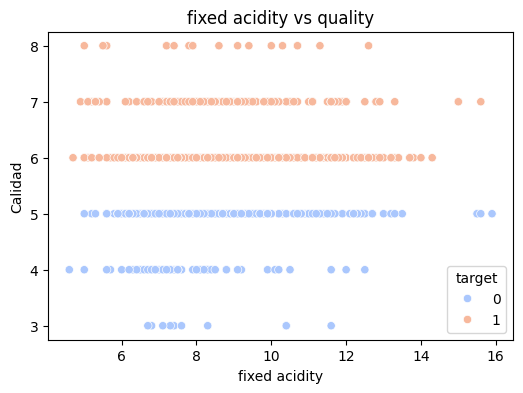

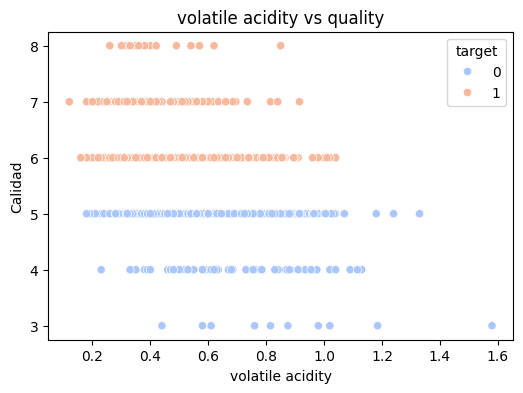

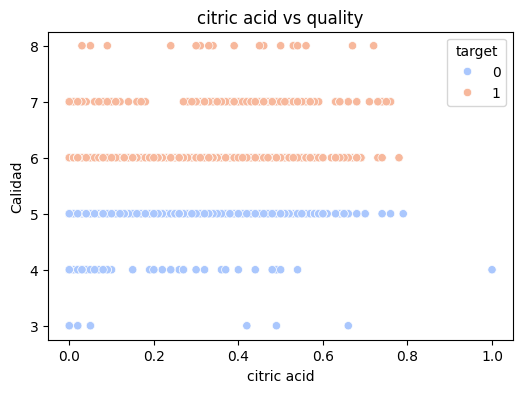

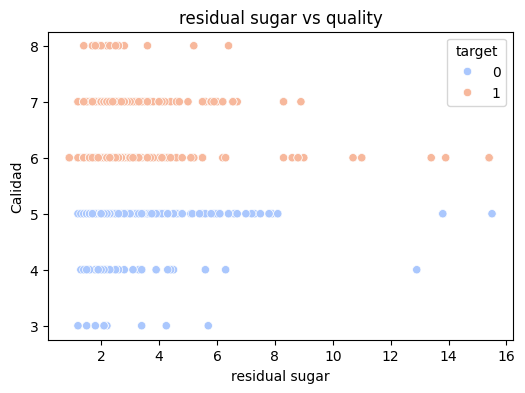

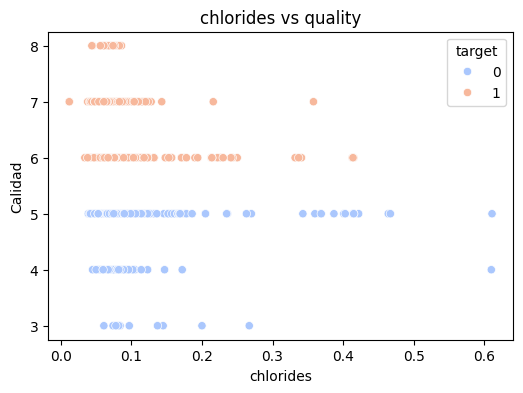

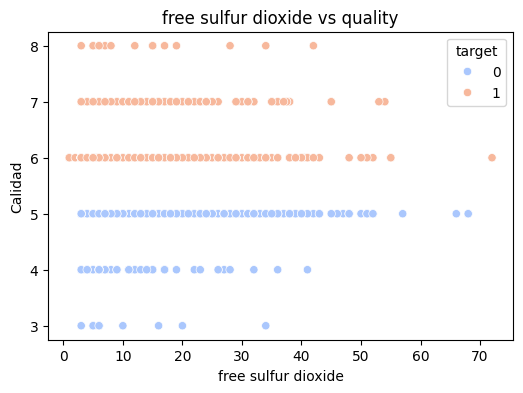

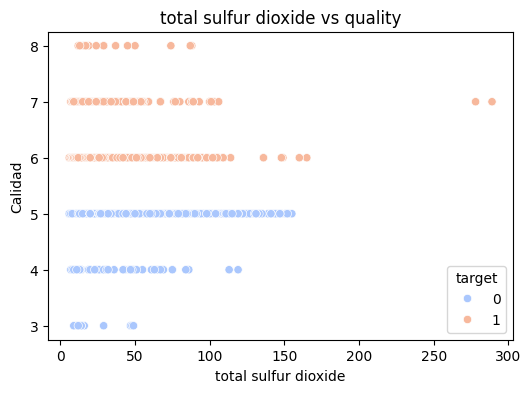

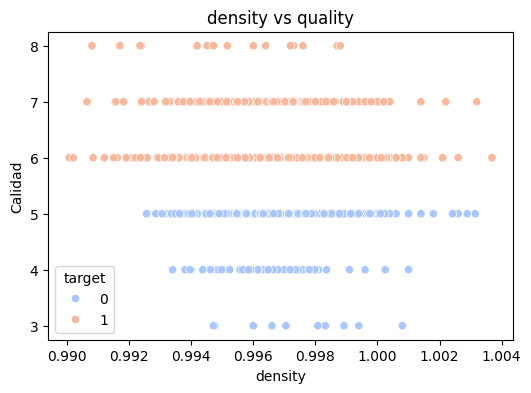

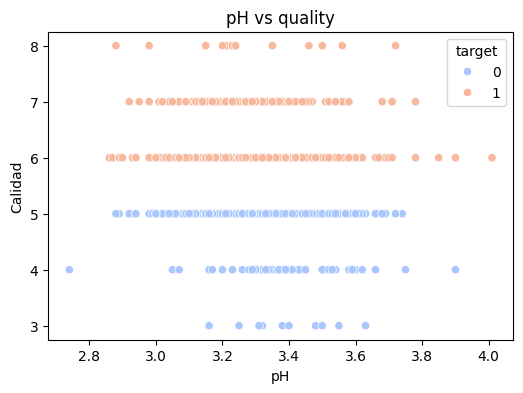

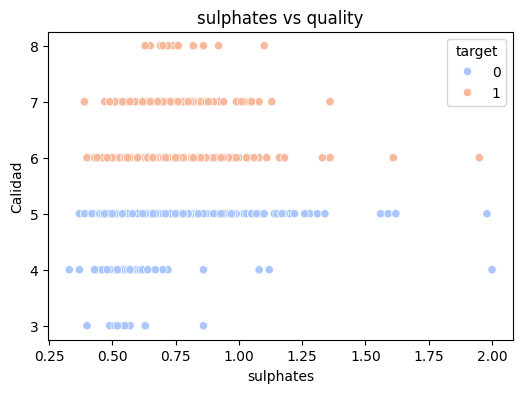

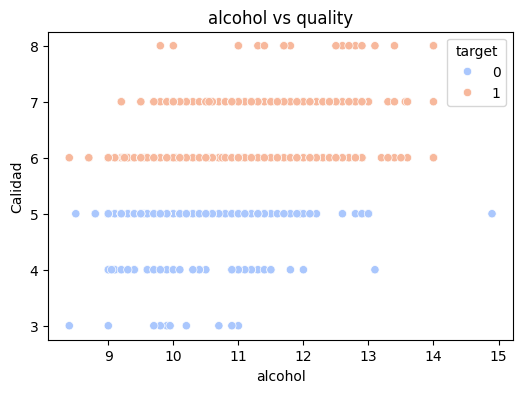

In [6]:
df["target"] = (df["quality"] >= 6).astype(int)

for col in df.columns[:-2]: 
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df["quality"], hue=df["target"], palette="coolwarm")
    plt.title(f"{col} vs quality")
    plt.xlabel(col)
    plt.ylabel("Calidad")
    plt.show()

## Pruebas Chi-Cuadrado

In [ ]:
from scipy.stats import chi2_contingency

features = [col for col in df.columns if col not in ['quality', 'target']]

results = []

for col in features:
    # Discretizar en 4 bins (cuartiles) para convertir en variable categórica
    df[col + '_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
    
    # Tabla de contingencia
    table = pd.crosstab(df[col + '_bin'], df['target'])
    
    # Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(table)
    
    results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p
    })

chi_results = pd.DataFrame(results).sort_values(by="p-value")

print(chi_results)

print("\nVariables significativas (p < 0.05):")
print(chi_results[chi_results['p-value'] < 0.05])

                Variable        Chi2       p-value
10               alcohol  315.707128  3.962959e-68
9              sulphates  182.290099  2.824182e-39
1       volatile acidity  156.840806  8.807737e-34
7                density   88.416508  4.793328e-19
6   total sulfur dioxide   86.768425  1.082725e-18
2            citric acid   67.143887  1.744467e-14
4              chlorides   48.943677  1.340973e-10
0          fixed acidity   25.095454  1.474694e-05
5    free sulfur dioxide    5.435893  1.425236e-01
3         residual sugar    1.835783  6.071792e-01
8                     pH    1.067559  7.849106e-01

Variables significativas (p < 0.05):
                Variable        Chi2       p-value
10               alcohol  315.707128  3.962959e-68
9              sulphates  182.290099  2.824182e-39
1       volatile acidity  156.840806  8.807737e-34
7                density   88.416508  4.793328e-19
6   total sulfur dioxide   86.768425  1.082725e-18
2            citric acid   67.143887  1.7444

## Feature Engineering

## Stratified Sampling